In [1]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Set plot style
sns.set(style="whitegrid")

In [2]:
# Cell 2: Load the Dataset with Column Names
# The dataset from UCI doesn't have a header. We need to add it manually.
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# The path is '../data/' because our notebook is in the 'notebooks' folder.
df = pd.read_csv('../data/heart_disease.csv', header=None, names=column_names, na_values='?')

print("Dataset loaded successfully!")
df.head()

Dataset loaded successfully!


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
# Cell 3: Check for Missing Values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Handle missing values - we'll use median imputation for simplicity
# New and improved way (no warning)
df['ca'] = df['ca'].fillna(df['ca'].median())
df['thal'] = df['thal'].fillna(df['thal'].median())

print("\nMissing values after cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Missing values after cleaning:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [5]:
# Cell 4: Correct the Target Variable
# The dataset labels target as 0 (no disease) and 1, 2, 3, 4 (various stages of disease).
# We will simplify this to a binary classification: 0 = no disease, 1 = disease.
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

print("\nTarget variable distribution:")
print(df['target'].value_counts())


Target variable distribution:
target
0    164
1    139
Name: count, dtype: int64


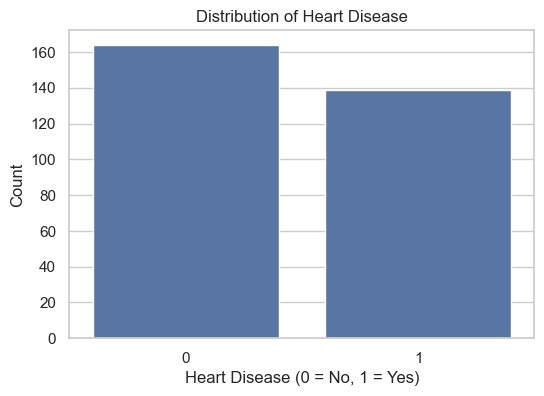

In [6]:
# Cell 5: EDA - Target Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

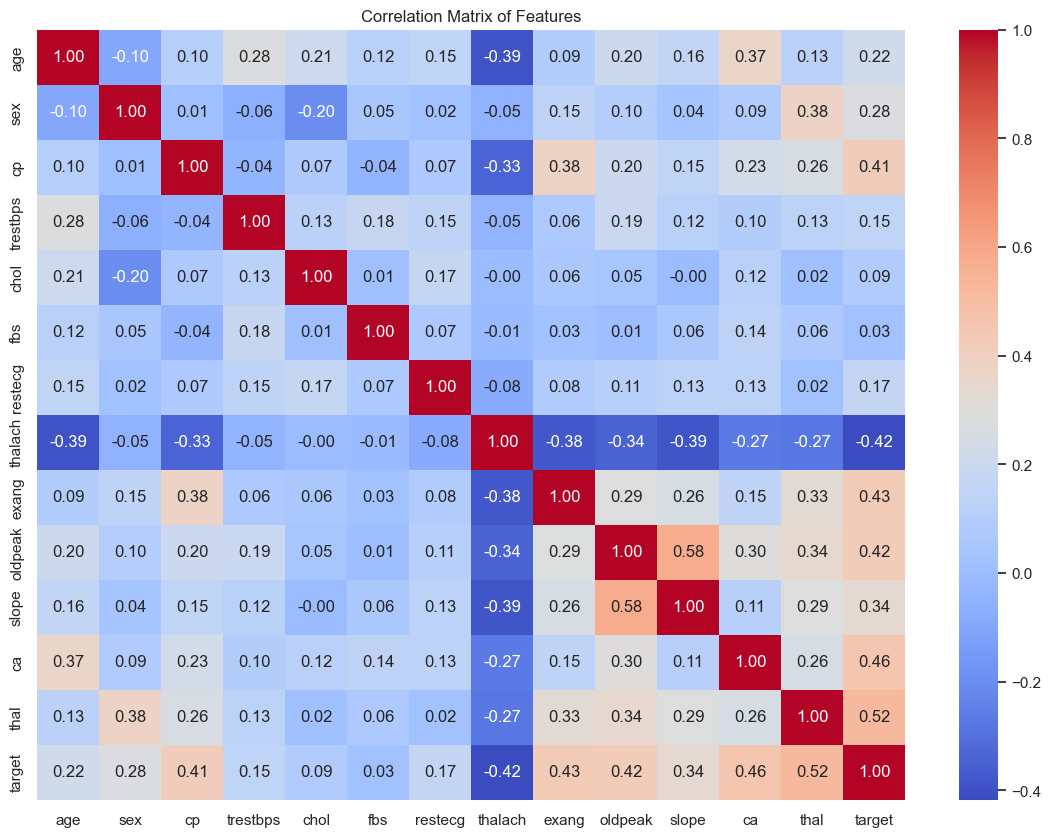

In [7]:
# Cell 6: EDA - Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

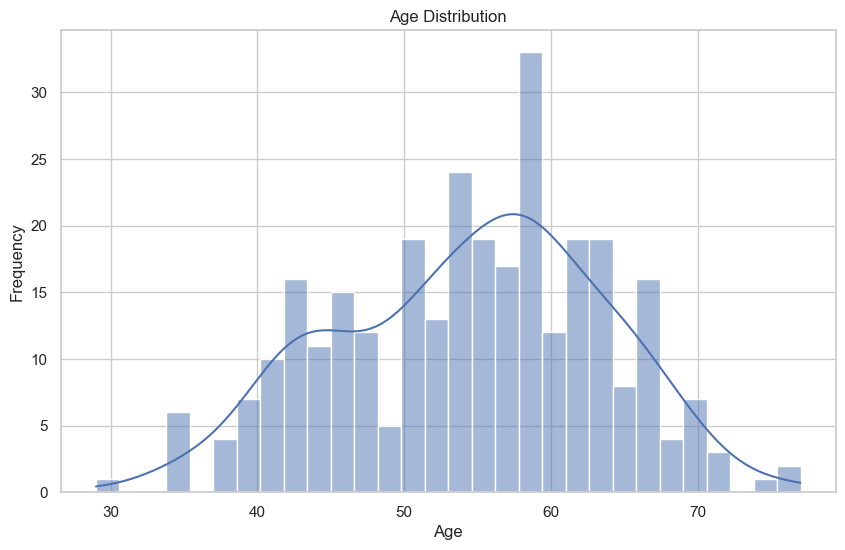

In [8]:
# Cell 7: EDA - Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Cell 8: One-Hot Encode Categorical Variables
# Identify categorical columns (those with a small number of unique values)
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1.0,cp_2.0,cp_3.0,cp_4.0,...,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,150.0,2.3,0,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
1,67.0,160.0,286.0,108.0,1.5,1,True,False,False,True,...,False,True,True,True,False,False,False,True,False,False
2,67.0,120.0,229.0,129.0,2.6,1,True,False,False,True,...,False,True,True,True,False,False,True,False,False,True
3,37.0,130.0,250.0,187.0,3.5,0,True,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,41.0,130.0,204.0,172.0,1.4,0,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False


In [10]:
# Cell 9: Scale Numerical Features
# Identify numerical columns to scale
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Also save the scaler for later use in the UI
import joblib
joblib.dump(scaler, '../models/scaler.pkl')

df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1.0,cp_2.0,cp_3.0,cp_4.0,...,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,0.948726,0.757525,-0.264900,0.017197,1.087338,0,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
1,1.392002,1.611220,0.760415,-1.821905,0.397182,1,True,False,False,True,...,False,True,True,True,False,False,False,True,False,False
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,1,True,False,False,True,...,False,True,True,True,False,False,True,False,False,True
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,0,True,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,0,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False


In [11]:
# Cell 10: Save the processed data
# This file will be used by all subsequent notebooks.
df.to_csv('../data/cleaned_heart_disease.csv', index=False)

print("Data preprocessing complete. Cleaned data saved!")

Data preprocessing complete. Cleaned data saved!
